# 0. Install Dependencies and Fetch Data

In [95]:
%!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

UsageError: Line magic function `%!pip` not found.


#    Import

In [96]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Reading | Describing

In [97]:
data = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

In [98]:
data.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\r\n\r\nCongratulations from me as well, use ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [99]:
data.tail(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159561,ffd2e85b07b3c7e4,"""\r\nNo he did not, read it again (I would hav...",0,0,0,0,0,0
159562,ffd72e9766c09c97,"""\r\n Auto guides and the motoring press are n...",0,0,0,0,0,0
159563,ffe029a7c79dc7fe,"""\r\nplease identify what part of BLP applies ...",0,0,0,0,0,0
159564,ffe897e7f7182c90,Catalan independentism is the social movement ...,0,0,0,0,0,0
159565,ffe8b9316245be30,The numbers in parentheses are the additional ...,0,0,0,0,0,0
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \r\n\r\nThat...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \r\n\r\nUmm, theres no actual article ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\r\nAnd ... I really don't think you understa...",0,0,0,0,0,0


In [100]:
data.corr()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


In [101]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
data.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Data visualisation

In [103]:
sns.set(rc={'axes.facecolor':'red'})

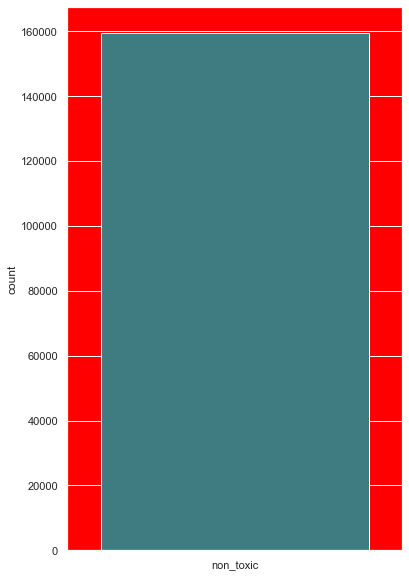

In [107]:
comments = [];
for comment in data['toxic']:
    if (comments == 1):
        comments.append('toxic');
    else:
        comments.append('non_toxic');
    
fig, ax =plt.subplots(figsize=(6,10)) 
sns.countplot(x=comments, palette='crest', ax=ax);

In [109]:
toxicity_criteria = []
for col in data.columns:
    toxicity_criteria.append(col)
del toxicity_criteria[:2]
print(toxicity_criteria)


['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [111]:
comments_sum = len(data)
toxic_sum = data[toxicity_criteria[0]].sum()
severe_toxic_sum = data[toxicity_criteria[1]].sum()
obscene_sum = data[toxicity_criteria[2]].sum()
thread_sum = data[toxicity_criteria[3]].sum()
insult_sum = data[toxicity_criteria[4]].sum()
identity_hate_sum = data[toxicity_criteria[5]].sum()

In [113]:
print("Comment: " + str(comments_sum))
print("Toxic_comment: " + str(toxic_sum))
print("severe toxic comment:" + str(severe_toxic_sum))
print("Obscene comments:" + str(obscene_sum))
print("threat comment:" + str(thread_sum))
print("insult comment:" + str(insult_sum))
print("identity hate comment:" + str(identity_hate_sum))

Comment: 159571
Toxic_comment: 15294
severe toxic comment:1595
Obscene comments:8449
threat comment:478
insult comment:7877
identity hate comment:1405


<AxesSubplot:title={'center':'different commentaire'}>

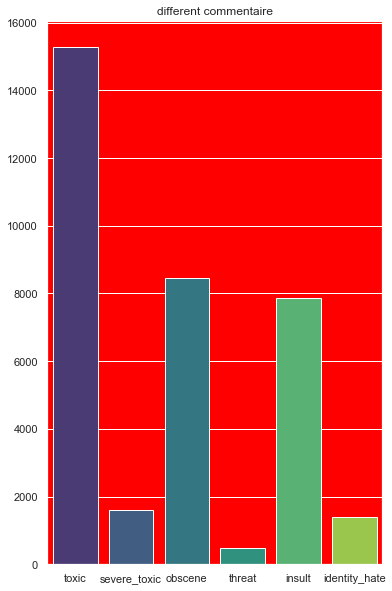

In [115]:
toxicity_sum = [toxic_sum,severe_toxic_sum,obscene_sum,thread_sum,insult_sum,identity_hate_sum]

fig, ax =plt.subplots(figsize=(6,10))

plt.title('different commentaire')

sns.barplot(x=toxicity_criteria, y=toxicity_sum, palette='viridis', ax=ax)

<AxesSubplot:title={'center':'different commentaire'}>

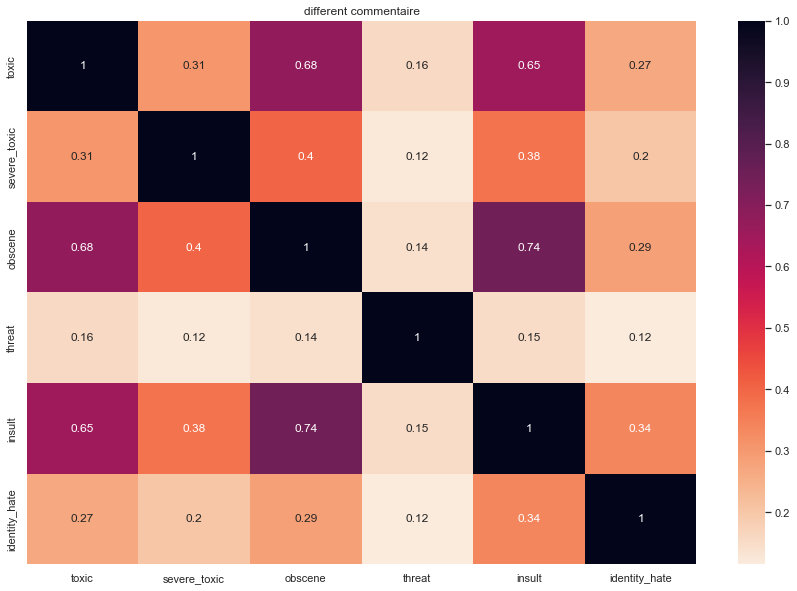

In [116]:
fig, ax =plt.subplots(figsize=(15,10))
plt.title('different commentaire')
sns.heatmap(data[toxicity_criteria].corr(), cmap='rocket_r',annot=True)

# 1. Preprocess

In [ ]:
!pip list

In [13]:
from tensorflow.keras.layers import TextVectorization #Tokenize the text

In [14]:
#Splitting data into comments and features
X = data['comment_text']
y = data[data.columns[2:]].values


In [15]:
MAX_FEATURES = 200000 # number of words in the vocab

In [16]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [17]:
vectorizer.adapt(X.values)

In [18]:
vectorized_text = vectorizer(X.values)

In [19]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
#Creatingn Data pipeline
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [20]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

# 2. Create Sequential Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [22]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [23]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [39]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 15520s 2s/step - loss: 0.0625 - val_loss: 0.0480


In [25]:
from matplotlib import pyplot as plt

In [26]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

NameError: name 'history' is not defined

<Figure size 576x360 with 0 Axes>

# 3. Make Predictions

In [105]:
max_len = 100
input_seq = vectorizer('You freaking suck! I am going to hit you.') 


In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
res = model.predict(input_seq, None)

NameError: name 'input_seq' is not defined

In [61]:
(res > 0.5).astype(int)

NameError: name 'res' is not defined

In [30]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [31]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 1s 824ms/step


array([[0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1]])

In [32]:
res.shape

NameError: name 'res' is not defined

# 4. Evaluate Model

In [33]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 136ms/step


In [45]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8245860934257507, Recall:0.693013608455658, Accuracy:0.45737212896347046


# 5. Test and Gradio

In [68]:
%!pip install gradio jinja2

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
import gradio as gr

In [70]:
model.save('toxicity.h5')

In [42]:
model = tf.keras.models.load_model('toxic_comment_detector.h5')

In [43]:
input_str = vectorizer('hey i freaken hate you!')

In [44]:
res = model.predict(np.expand_dims(input_str,0))


1/1 [==============================] - 1s 661ms/step


In [45]:
res

array([[0.60680914, 0.005981  , 0.17017385, 0.01127548, 0.23209864,
        0.04034175]], dtype=float32)

In [46]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(data.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [47]:
inputs = gr.inputs.Textbox(lines=2, placeholder='Comment to score')
outputs = gr.outputs.Textbox(label='Comment score')

interface = gr.Interface(fn=score_comment, inputs=inputs, outputs=outputs, 
                         title='Comment Scorer', description='Enter a comment to get its score')
interface.launch()

c:\Users\7vault\anaconda3\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\7vault\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\7vault\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\7vault\anaconda3\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 82ms/step


In [2]:
from gradio.components import Textbox,Text

In [3]:
inputs = Textbox(lines=2, placeholder='Comment to score')
outputs = Text(label='Comment score')

interface = gr.Interface(fn=score_comment, inputs=inputs, outputs=outputs, 
                         title='Comment Scorer', description='Enter a comment to get its score')
interface.launch()


NameError: name 'gr' is not defined

In [49]:
def evaluate_comment(comment):
    tokenizer_comment = vectorizer([comment])
    result = model.predict(tokenizer_comment)
    text = 'Taper votre text:\n'
    for index, colums in enumerate(data.columns[2:]):
    
        if colums == 'toxic':
            if result[0][index] > 0.5:
                text += '-toxic\n'
            else:
                text += '-non_toxic\n'
        elif colums == 'severe_toxic':
            if result[0][index] > 0.5:
                text += '-severe Toxic'
        elif colums == 'obscene':
            if result[0][index] > 0.5:
                text += '-Obscene\n'
        elif colums == 'threat':
            if result[0][index] > 0.5:
                text += '-threatening\n'
        elif colums == 'insult':
            if result[0][index] > 0.5:
                text += '-Offensive\n'
        elif colums == 'identity_hate':
            if result[0][index] > 0.5:
                text += '-racist\n' 
    if result[0][0]>0.5:
        text += "\n\nNo need to be toxic ! being nice won't hurt you \N{grimacing face}"
    else:
        text += "\n\nKeep it up \N{grimacing face}"
    return text
        

In [50]:
GradioGUI = gr.Interface(
fn = evaluate_comment,
inputs = gr.inputs.Textbox(lines=5,placeholder="Entrer votre commentaire"),
outputs="text",
title="Toxic detector comment",
description="Notre projet essaie de detecter les mauvais commentaires",
css='''span{text-transform: uppercase} p{text-align: center}''')

c:\Users\7vault\anaconda3\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\7vault\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\7vault\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [51]:
GradioGUI.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 70ms/step
